In [9]:
import requests
import json
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np

In [10]:
def get_kline_data():
    '''
    This function block retrieve historical
    Kline data for BTCINR with interval of 1 day
    '''
    try:
        # Crypto currency pair of interest
        pair = "BTCINR"
        interval = "1d"

        # Prepare the request body (JSON)
        params = {
            'pair': pair,
            'interval': interval,
            'limit': 1000 
        }

        # Headers for the POST request (no API key or signature required)
        headers = {
            'Content-Type': 'application/json'
        }

        # Construct the full URL for the Kline endpoint
        kline_url = "https://api.pi42.com/v1/market/klines"

        # Send the POST request to get Kline data
        response = requests.post(kline_url, json=params, headers=headers)
        response.raise_for_status()  # Raises an error for 4xx/5xx responses

        # Parse the JSON response data and save it to a variable
        response_data = response.json()

        # Save the data into a variable
        kline_data = response_data

        return kline_data

    except ValueError:
        print("Please enter valid inputs for pair, interval.")
    except requests.exceptions.HTTPError as err:
        print(f"Error: {err.response.text if err.response else err}")
    except Exception as e:
        print(f"An unexpected error occurred: {str(e)}")

In [11]:
data = get_kline_data()
df = pd.DataFrame(data)

C:\Users\goura\AppData\Local\Temp\ipykernel_22032\57102712.py:11: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['startTime'] = pd.to_datetime(df['startTime'], unit='ms')


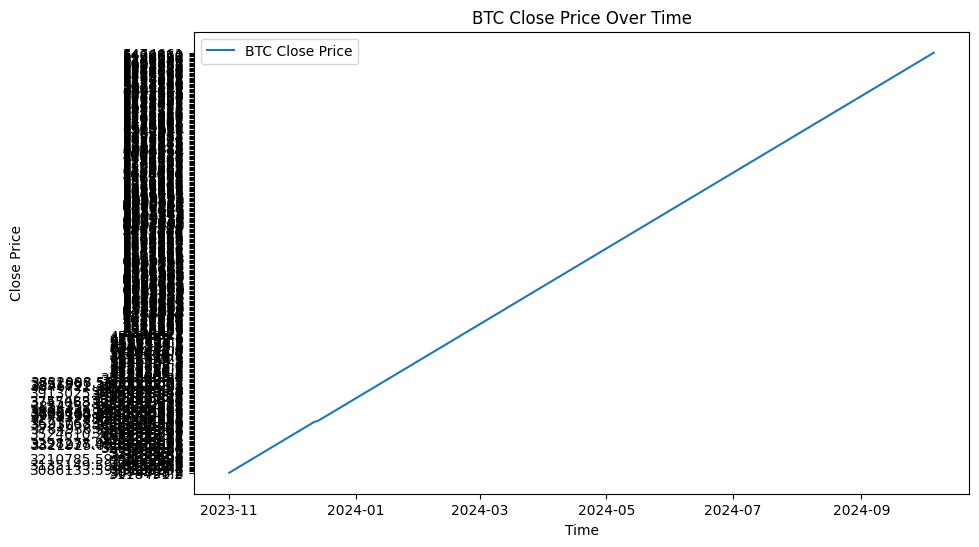

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7193.766, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7191.173, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7188.307, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7188.128, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7190.574, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7190.119, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=7189.892, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=7191.800, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=7188.076, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=7189.994, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=7189.962, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=7188.247, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=7192.067, Time=0.05 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.982 seconds
                      

C:\Users\goura\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\goura\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


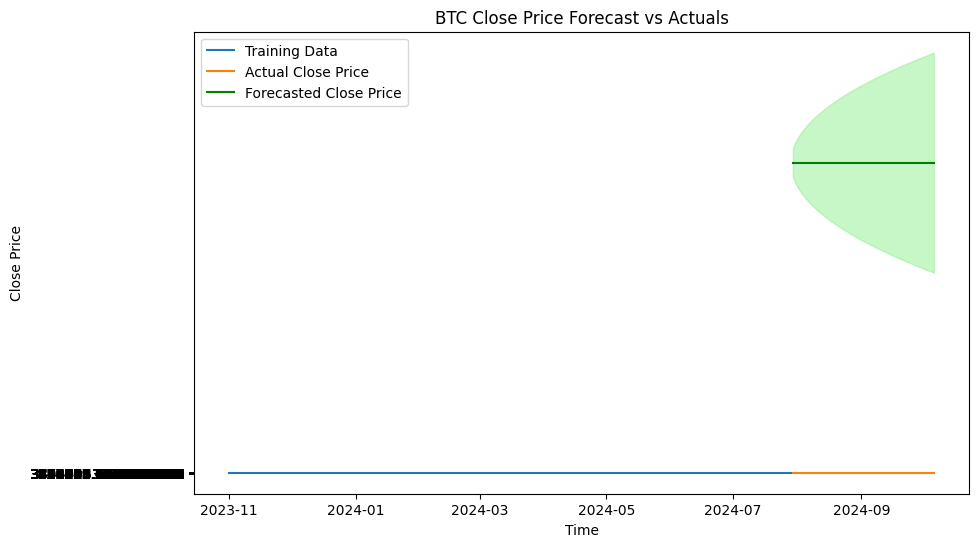

Root Mean Squared Error (RMSE): 554851.74


C:\Users\goura\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\goura\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


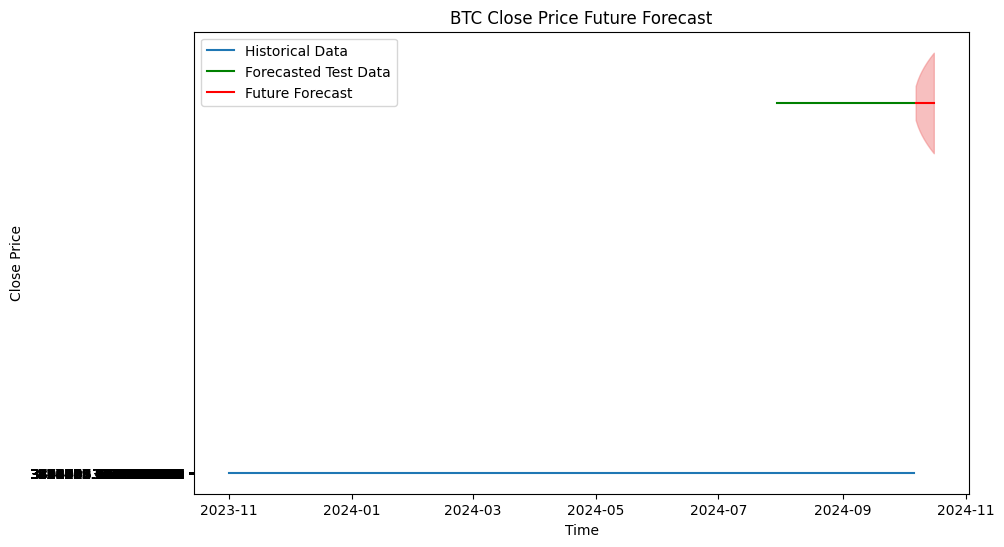

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming the dataframe (df) is already loaded with the relevant data
# The DataFrame contains columns: 'startTime', 'endTime', 'open', 'close', 'high', 'low', 'volume'

# Convert the startTime to datetime for time series analysis
df['startTime'] = pd.to_datetime(df['startTime'], unit='ms')

# Set the index to the startTime for time series analysis
df.set_index('startTime', inplace=True)

# Visualize the close prices
plt.figure(figsize=(10, 6))
plt.plot(df['close'], label='BTC Close Price')
plt.title('BTC Close Price Over Time')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Extract the close prices for ARIMA modeling
close_prices = df['close']

# Split the data into training and test sets (80% train, 20% test)
train_size = int(len(close_prices) * 0.8)
train_data = close_prices[:train_size]
test_data = close_prices[train_size:]

# Fit the auto_arima model on the training data
model = pm.auto_arima(train_data, seasonal=False, trace=True,
                      suppress_warnings=True, stepwise=True, error_action='ignore')

# Print model summary
print(model.summary())

# Forecast the future values (length of the test data)
n_periods = len(test_data)
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)

# Create a forecast index to match the test data
forecast_index = pd.date_range(start=test_data.index[0], periods=n_periods, freq='D')

# Plot the forecasts along with the actual test data
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Actual Close Price')
plt.plot(forecast_index, forecast, label='Forecasted Close Price', color='green')
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='lightgreen', alpha=0.5)
plt.title('BTC Close Price Forecast vs Actuals')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Evaluate the model on the test data
mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Future predictions (optional, if you want to forecast further)
# e.g., Forecast the next 10 days after the test set
future_forecast, future_conf_int = model.predict(n_periods=10, return_conf_int=True)

# Create index for future forecast
future_forecast_index = pd.date_range(start=forecast_index[-1] + pd.Timedelta(days=1), periods=10, freq='D')

# Plot future predictions
plt.figure(figsize=(10, 6))
plt.plot(close_prices.index, close_prices, label='Historical Data')
plt.plot(forecast_index, forecast, label='Forecasted Test Data', color='green')
plt.plot(future_forecast_index, future_forecast, label='Future Forecast', color='red')
plt.fill_between(future_forecast_index, future_conf_int[:, 0], future_conf_int[:, 1], color='lightcoral', alpha=0.5)
plt.title('BTC Close Price Future Forecast')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()
